In [53]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psutil
import re
from IPython.core.display import display, HTML
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [54]:
tickets = pd.read_csv('data/hacknight_ticket_sample_data_2015.csv', low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [55]:
tickets_geo = pd.read_csv('data/hacknight_sample_data_geocode.csv', low_memory=False)


In [56]:
tickets_SEIZ_only = tickets[tickets.notice_level == "SEIZ"]
tickets_SEIZ_only

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
1,65543631,2015-01-10 17:09:00,423 N LARAMIE,13d93046fb2c3bc2d79baa8647d620d0c5a65fdc223cb9...,IL,PAS,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,15,CPD,CHRY,60,120,146.40,0.00,Notice,2015-01-28,SEIZ,NaN,5109291290,16391,"400 n laramie, chicago, il"
4,9189537354,2015-10-28 16:26:00,2410 N MONTICELLO AV,f0858c838c8cabda4e8fd3e0425a6c330a76e006f9de01...,IL,PAS,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,TOYT,50,100,0.00,100.00,Paid,2016-01-27,SEIZ,NaN,5168404170,1407,"2400 n monticello av, chicago, il"
8,66116401,2015-08-15 22:46:00,3100 W FILLMORE,1a6f9bfd652493a4bb6d0beeb5fa3e7872a38983c57aa3...,IL,PAS,606232113,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",11,CPD,BUIC,200,400,488.00,0.00,Notice,2016-10-03,SEIZ,NaN,5193679090,19533,"3100 w fillmore, chicago, il"
9,66291855,2015-11-24 23:24:00,6537 S CALUMET,8c4c93c8038966384c51d4e68416f3cb69a8e4631524ee...,WI,PAS,535113434,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,OLDS,60,120,146.40,0.00,Notice,2015-12-17,SEIZ,NaN,5185329810,15766,"6500 s calumet, chicago, il"
15,9188878506,2015-05-20 09:25:00,3801 N FREMONT,568f64f8c645a354725e3b86eaf6cd4ecad7d36dbab21f...,IL,PAS,60640,0964040B,STREET CLEANING,498,DOF,HOND,60,120,146.40,0.00,Notice,2015-05-28,SEIZ,NaN,5061140550,714,"3800 n fremont, chicago, il"
28,9189570641,2015-10-31 15:10:00,2540 W DIVISION,c0df89e15d857feea5118e1330da4f8146ef79beb300e8...,IA,PAS,510220105,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,HOND,50,100,0.00,122.00,Paid,2016-07-07,SEIZ,NaN,5193296260,1407,"2500 w division, chicago, il"
33,9189679052,2015-11-23 21:44:00,352 E WALTON ST,b87c8a670d19263d52007ef65e4dfba0d4cdbd37e5bf20...,IL,PAS,606412248,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,729,Miscellaneous,PONT,65,130,158.60,0.00,Notice,2015-12-02,SEIZ,NaN,5185149370,1424,"300 e walton st, chicago, il"
34,9188767045,2015-04-29 14:39:00,3025 N HALSTED ST,05ba77dfb1aeb005840e2b0095da1b570070ea0236f812...,IL,PAS,606577211,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,FORD,50,100,0.00,122.00,Paid,2017-10-31,SEIZ,NaN,5183649580,794,"3000 n halsted st, chicago, il"
43,65583845,2015-04-01 00:26:00,3610 W DOUGLAS BLVD,b068684ccd557884cefc77c708e38fb8d5f9c0a5282126...,IL,TMP,60623,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,10,CPD,PONT,60,120,146.40,0.00,Notice,2015-04-08,SEIZ,NaN,5185726240,9006,"3600 w douglas blvd, chicago, il"
59,65825848,2015-04-12 16:07:00,2100 S PULASKI,b1801232ba092a8ce35039b4f8f7c1bc13b01c16cd4777...,IL,PAS,606513145,0964100D,DISABLED CURB CUT,10,CPD,CHEV,75,150,183.00,0.00,Notice,2015-04-22,SEIZ,NaN,5075039420,8820,"2100 s pulaski, chicago, il"


In [57]:
len(tickets_SEIZ_only)

9422

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


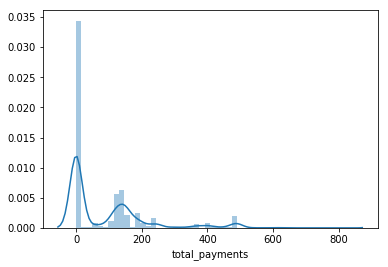

In [58]:
sns.distplot(tickets_SEIZ_only['total_payments'])

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


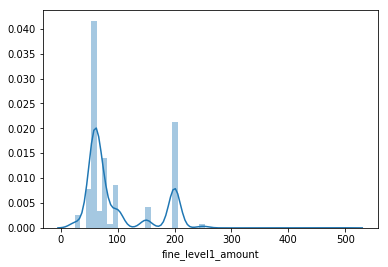

In [59]:
sns.distplot(tickets_SEIZ_only['fine_level1_amount'])

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


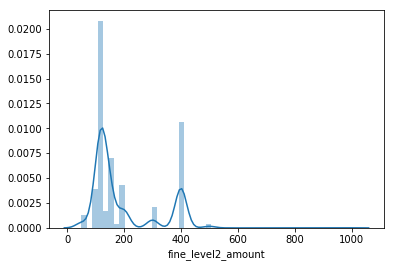

In [60]:
sns.distplot(tickets_SEIZ_only['fine_level2_amount'])

Ok, this is basically the same graph with the goals posts moved one length. So it looks like those on the boot list basically had their fine levels (or amount they had to pay) double between fine1 and fine2. 

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


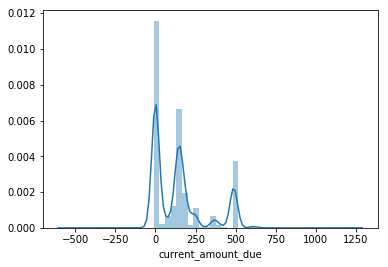

In [61]:
sns.distplot(tickets_SEIZ_only['current_amount_due'])

For current amount due, it looks like a lot of people just paid the fine (hence the 0), and got themselves off the boot list. But others owe anywhere from 125-ish up to 500. 

In [62]:
#What did the people who owe ~500 do to deserve this??? 
#I'll look at those who have more than 499 to start

tickets_SEIZ_500club = tickets[tickets.current_amount_due > 499]
tickets_SEIZ_500club.violation_description.value_counts()



DISABLED PARKING ZONE                                 68
NO CITY STICKER VEHICLE OVER 16,000 LBS.              18
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.     1
Name: violation_description, dtype: int64

OK, looks like it's mostly parking in a disabled parking zone. Makes sense because the disabled parking fine is $250 (per the city website).

But that doesn't seem like something people do a ton, from my admittedly-ancedotal evidence of people in my neighborhood preferring to park in front of a fire hydrant rather than a diabled parking zone. But let's test that in the full data set. What's the prevalance of people parking in a diabled zone?

In [63]:
tickets.violation_description.value_counts()

EXPIRED PLATES OR TEMPORARY REGISTRATION              8791
STREET CLEANING                                       6273
EXP. METER NON-CENTRAL BUSINESS DISTRICT              5773
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.    5183
RESIDENTIAL PERMIT PARKING                            4013
PARKING/STANDING PROHIBITED ANYTIME                   3188
REAR AND FRONT PLATE REQUIRED                         2717
EXPIRED METER CENTRAL BUSINESS DISTRICT               2474
NO STANDING/PARKING TIME RESTRICTED                   1793
RUSH HOUR PARKING                                     1593
WITHIN 15' OF FIRE HYDRANT                            1002
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND               876
STOP SIGN OR TRAFFIC SIGNAL                            502
DOUBLE PARKING OR STANDING                             474
TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET               425
NONCOMPLIANT PLATE(S)                                  406
PARK ALLEY                                             3

In [64]:
#OK, let's just look at the SEIZ_only ticket desctiption counts for good measure

tickets_SEIZ_only.violation_description.value_counts()

EXPIRED PLATES OR TEMPORARY REGISTRATION              2172
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.    1908
STREET CLEANING                                        763
EXP. METER NON-CENTRAL BUSINESS DISTRICT               646
RESIDENTIAL PERMIT PARKING                             582
PARKING/STANDING PROHIBITED ANYTIME                    491
REAR AND FRONT PLATE REQUIRED                          479
EXPIRED METER CENTRAL BUSINESS DISTRICT                307
RUSH HOUR PARKING                                      247
NO STANDING/PARKING TIME RESTRICTED                    236
WITHIN 15' OF FIRE HYDRANT                             191
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND               184
PARK ALLEY                                             104
DOUBLE PARKING OR STANDING                             100
DISABLED PARKING ZONE                                   77
NONCOMPLIANT PLATE(S)                                   76
STOP SIGN OR TRAFFIC SIGNAL                             

Yup, the data supports my hunch. Parking in front of a fire hydrant ranks in as #11 most common violation in this sample (with 1002 instances), while disabled parking zone is #19 with only 302 instances in the sample.


And this same ranking of ticket description counts is reflected in the SEIZ subset, so it seems that those on the bootlist are a smaller subset that reflects the rankings of the whole.

In [65]:
#Ok, let's take a look at violations with a amount due that's around 125, since the other filter seemed too high.


tickets_SEIZ_500club = tickets[tickets.current_amount_due > 125]
tickets_SEIZ_500club.violation_description.value_counts()

NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.    2442
EXPIRED PLATES OR TEMPORARY REGISTRATION              1846
STREET CLEANING                                        502
RESIDENTIAL PERMIT PARKING                             452
REAR AND FRONT PLATE REQUIRED                          425
PARKING/STANDING PROHIBITED ANYTIME                    399
WITHIN 15' OF FIRE HYDRANT                             243
EXPIRED METER CENTRAL BUSINESS DISTRICT                222
NO STANDING/PARKING TIME RESTRICTED                    164
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND               160
RUSH HOUR PARKING                                      150
PARK ALLEY                                             136
DISABLED PARKING ZONE                                   97
DOUBLE PARKING OR STANDING                              86
BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE                    67
STAND, PARK, OR OTHER USE OF BUS LANE                   59
NONCOMPLIANT PLATE(S)                                   

So Ed came up with a good idea to group the tickets by notice_number to find the ticket numbers that go with the SEIZ designation.

So we have a SEIZ dataset built, let's group it by notice_number, then tease out the ticket_numbers and what dates they were issued.

In [66]:

tickets_SEIZ_notice = tickets_SEIZ_only[['issue_date', 'ticket_queue_date','ticket_number', 'notice_number']].groupby(['notice_number']).nunique()
tickets_SEIZ_notice.sort_values(by=['ticket_number'], ascending=False)

,issue_date,ticket_queue_date,ticket_number,notice_number
notice_number,,,,
5177323210,13,10,13,1
5191576050,6,5,6,1
5187724250,6,1,6,1
5164931680,4,4,4,1
5184937740,4,3,4,1
5189428510,2,2,3,1
5191940730,3,3,3,1
5173530100,3,1,3,1
5184810680,3,1,3,1


Makes sense that issue_date matches up exactly with ticket_number, since each individual ticket has it's own issue date. BUT I did see some non-matching ticket and issue date numbers when I first ran those (i.e. 3 counts of ticket numbers but only 2 issue dates. This would indicate multiple tickets on one day, which does happen).

ticket_queue_date should indicate the date they got a SEIZ notice, since this only have SEIZs in it.
ticket_queue_date: when the “ticket_queue” was last updated.



In [67]:
#looking at the top one with 13 tickets and 10 ticket_queue_dates

scoff=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5177323210]
scoff.sort_values(by=['issue_date'], ascending=True)



,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
12498,65194981,2015-01-01 20:13:00,2 E 57TH ST,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,2,CPD,HOND,60,120,146.4,0.0,Notice,2015-01-14,SEIZ,NaN,5177323210,6365,"2 e 57th st, chicago, il"
26906,65595043,2015-01-02 02:35:00,6354 S KING DR,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-01-14,SEIZ,NaN,5177323210,13354,"6300 s king dr, chicago, il"
19827,65593802,2015-01-12 16:52:00,6362 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,HOND,200,400,488.0,0.0,Notice,2015-02-11,SEIZ,NaN,5177323210,18779,"6300 s calumet, chicago, il"
34199,65752379,2015-02-27 16:20:00,6436 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,HOND,200,400,488.0,0.0,Notice,2015-04-01,SEIZ,NaN,5177323210,18462,"6400 s calumet, chicago, il"
12895,65748944,2015-02-28 16:45:00,6364 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-03-25,SEIZ,NaN,5177323210,16545,"6300 s calumet, chicago, il"
32783,65752408,2015-03-01 16:37:00,6363 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-03-25,SEIZ,NaN,5177323210,17443,"6300 s calumet, chicago, il"
9153,65642631,2015-03-12 19:33:00,6436 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,HOND,200,400,488.0,0.0,Notice,2015-04-22,SEIZ,NaN,5177323210,18779,"6400 s calumet, chicago, il"
14664,65843020,2015-03-31 17:41:00,6364 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,HOND,200,400,488.0,0.0,Notice,2015-04-29,SEIZ,NaN,5177323210,16614,"6300 s calumet, chicago, il"
41781,65841097,2015-04-15 18:02:00,6436 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-05-06,SEIZ,NaN,5177323210,17624,"6400 s calumet, chicago, il"
19503,65842995,2015-04-17 15:24:00,6436 S CALUMET,6e10183be3982ddaa3551f36ce7b95286a4746a38c817b...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,HOND,60,120,146.4,0.0,Notice,2015-04-29,SEIZ,NaN,5177323210,6430,"6400 s calumet, chicago, il"


It looks like the scoff person is a catch-all for when the cops don't know who the person is. The license plate type is TMP for all of them and it's a lot of expired plates and missing city stickers. Probably not the best first example to pull. 

In [68]:
#looking at a regular person with 3 issue dates, 3 ticket numbers, and 1 ticket_queue date
regular_person=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5184810680]
regular_person.sort_values(by=['issue_date'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
16617,65665694,2015-01-02 03:28:00,6240 S ARTESIAN,f27b26c3fcd18b7e717a6525b4adec9646c406a108979c...,IL,PAS,606363310,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,CPD,FORD,60,120,146.4,0.0,Notice,2015-10-08,SEIZ,NaN,5184810680,8661,"6200 s artesian, chicago, il"
41722,65607839,2015-01-19 21:09:00,6236 S ARTESIAN,f27b26c3fcd18b7e717a6525b4adec9646c406a108979c...,IL,PAS,606363310,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,CPD,FORD,60,120,146.4,0.0,Notice,2015-10-08,SEIZ,NaN,5184810680,2888,"6200 s artesian, chicago, il"
409,64716415,2015-01-23 19:13:00,6230 S ARTESIAN,f27b26c3fcd18b7e717a6525b4adec9646c406a108979c...,IL,PAS,606363310,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,CPD,FORD,60,120,146.4,0.0,Notice,2015-10-08,SEIZ,NaN,5184810680,7988,"6200 s artesian, chicago, il"


Ok this person fits more of an expected pattern. Got 3 tickets over 3 dates, but all in the same month (issue_dates all are in Jan 2015).

They all match up to one notice number with its ticket_queue date of 10-8-2015. Looks like it took them about 7 months to go from getting the last ticket to updating this person's record to indicate they got the SEIZ notice (OR that the person hadn't paid in the 7 months? hard to say). Which is weird because you think they would have done that sooner. BUT ticket_queue date is just the last date the ticket_queue field was updated, so maybe it just takes them 7 months to update records?

So they could have gotten an earlier notices about these 3 tickets, but still been on the boot list up until October. Or maybe this means they were on the boot list for 7 months?

In [69]:
#this is a person with 4 issue dates, 4 tickets, and 3 ticket_queue_dates (for 3 SEIZ notices?)
regular_person2=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5184937740]
regular_person2.sort_values(by=['issue_date'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
24527,65595113,2015-01-28 16:03:00,6416 S EBERHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-02-11,SEIZ,NaN,5184937740,10494,"6400 s eberhart, chicago, il"
46336,65751803,2015-02-09 16:59:00,7121 S STATE,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-02-25,SEIZ,NaN,5184937740,17721,"7100 s state, chicago, il"
9873,65662181,2015-02-13 19:25:00,6414 S EBEHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,211,CPD-Other,PONT,60,120,146.4,0.0,Notice,2015-02-25,SEIZ,NaN,5184937740,11894,"6400 s ebehart, chicago, il"
29632,65592880,2015-02-27 11:08:00,6415 S EBERHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,PONT,60,120,146.4,0.0,Notice,2015-03-11,SEIZ,NaN,5184937740,16130,"6400 s eberhart, chicago, il"


Hmmm...why do these tickets have the same notice_number but different ticket_queue_dates? Maybe it's because this is only the SEIZ data. Maybe the other tickets that contributed to someone getting on the bootlist are VIOL and not SEIZ? Let's test search the bigger dataset for this notice number.

In [70]:

reg_person_notice=tickets[tickets.notice_number == 5184937740]
reg_person_notice.sort_values(by=['issue_date'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
24527,65595113,2015-01-28 16:03:00,6416 S EBERHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-02-11,SEIZ,NaN,5184937740,10494,"6400 s eberhart, chicago, il"
46336,65751803,2015-02-09 16:59:00,7121 S STATE,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-02-25,SEIZ,NaN,5184937740,17721,"7100 s state, chicago, il"
9873,65662181,2015-02-13 19:25:00,6414 S EBEHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,211,CPD-Other,PONT,60,120,146.4,0.0,Notice,2015-02-25,SEIZ,NaN,5184937740,11894,"6400 s ebehart, chicago, il"
29632,65592880,2015-02-27 11:08:00,6415 S EBERHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,PONT,60,120,146.4,0.0,Notice,2015-03-11,SEIZ,NaN,5184937740,16130,"6400 s eberhart, chicago, il"


Since it's still the same in the wider df, it seems that notice_number always matches up to ONE SEIZ notice, although the ticket_queue_date is different. Hmmm. Not sure why these dates look like this? If they got one notice for these 4 tickets, then why is the ticket_queue_date different for each ticket? 

Maybe the t_q_d denotes the date they sent the first violation notice and isn't updated later when they add that ticket to the seizure notice?

*****OR looking at this record closer, looks like this is a TMP license plate, so maybe they originally dind't know who it was and only later on put all the pieces together under one notice number when they realized it was the same car/person.

In [71]:
#grabbing the license plate number from the reg_person_notice we just loooked at by the row number and the column name
lisc=reg_person_notice.at[9873,'license_plate_number']
lisc

'dd02b975f2725080bf31c70823adc72b87dce1dc9385e26a7b5c0099eed22da2'

In [72]:
#searching that license plate we just grabbed in the larger dataset
reg_lisc=tickets[tickets.license_plate_number==lisc]
reg_lisc

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
9873,65662181,2015-02-13 19:25:00,6414 S EBEHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,211,CPD-Other,PONT,60,120,146.4,0.0,Notice,2015-02-25,SEIZ,NaN,5184937740,11894,"6400 s ebehart, chicago, il"
24527,65595113,2015-01-28 16:03:00,6416 S EBERHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-02-11,SEIZ,NaN,5184937740,10494,"6400 s eberhart, chicago, il"
29632,65592880,2015-02-27 11:08:00,6415 S EBERHART,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,PONT,60,120,146.4,0.0,Notice,2015-03-11,SEIZ,NaN,5184937740,16130,"6400 s eberhart, chicago, il"
46336,65751803,2015-02-09 16:59:00,7121 S STATE,dd02b975f2725080bf31c70823adc72b87dce1dc9385e2...,IL,TMP,60637,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-02-25,SEIZ,NaN,5184937740,17721,"7100 s state, chicago, il"


Ughhh, again, the main dataset is still the same as the SEIZ dataset. Don't know if this is because it's a sample and thus doesn't have the other ticket data OR maybe it just seems that they update the VIOL to SEIZ and over-write the previous entries. 

In [73]:




regular_person6_5_6=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5191576050]
regular_person6_5_6.sort_values(by=['issue_date'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
4913,9189000425,2015-06-19 07:40:00,7922 S WABASH,f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb...,IL,TMP,60649,0964090E,RESIDENTIAL PERMIT PARKING,498,DOF,PONT,75,150,183.0,0.0,Notice,2015-07-02,SEIZ,NaN,5191576050,125,"7900 s wabash, chicago, il"
47268,65896367,2015-06-23 19:43:00,7923 S WABASH,f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb...,IL,TMP,60649,0964090E,RESIDENTIAL PERMIT PARKING,6,CPD,PONT,75,150,183.0,0.0,Notice,2015-07-02,SEIZ,NaN,5191576050,11213,"7900 s wabash, chicago, il"
17834,66027328,2015-06-27 18:26:00,6848 S STONY ISLAND,f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb...,IL,TMP,60649,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.0,0.0,Notice,2015-07-15,SEIZ,NaN,5191576050,16448,"6800 s stony island, chicago, il"
5755,9189165457,2015-07-23 00:06:00,207 S WABASH AV,f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb...,IL,TMP,60649,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,502,DOF,PONT,65,130,158.6,0.0,Notice,2015-07-30,SEIZ,NaN,5191576050,1546,"200 s wabash av, chicago, il"
19782,9189514157,2015-10-09 01:31:00,209 S WABASH AV,f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb...,IL,TMP,60649,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,502,DOF,PONT,65,130,158.6,0.0,Notice,2015-10-15,SEIZ,NaN,5191576050,830,"200 s wabash av, chicago, il"
39562,9189413378,2015-10-26 08:49:00,7926 S WABASH,f774c813bcffc5b490c4f24dcae1b6fd3577d0333264eb...,IL,TMP,60649,0964090E,RESIDENTIAL PERMIT PARKING,498,DOF,PONT,75,150,183.0,0.0,Notice,2015-10-29,SEIZ,NaN,5191576050,289,"7900 s wabash, chicago, il"


In [74]:
#looking at a person with 2 issue dates, 1 T_Q_D, and 2 tickets.



regular_person2_1_2=tickets_SEIZ_only[tickets_SEIZ_only.notice_number==5177925220]
regular_person2_1_2.sort_values(by=['issue_date'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
4498,65853886,2015-07-11 23:10:00,213 N CENTRAL,81ac4bfd23035aedb7b2acd7d3850987be9fd1fe7e3305...,IL,PAS,606474837,0964130A,PARK ALLEY,18,CPD,CHRY,150,300,366.0,0.0,Bankruptcy,2016-03-15,SEIZ,NaN,5177925220,6557,"200 n central, chicago, il"
45619,66222705,2015-07-30 07:33:00,3400 W ARMITAGE,81ac4bfd23035aedb7b2acd7d3850987be9fd1fe7e3305...,IL,PAS,606474837,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,14,CPD,CHRY,60,120,146.4,0.0,Bankruptcy,2016-03-15,SEIZ,NaN,5177925220,7125,"3400 w armitage, chicago, il"


Looks like this is someone who only got to 2 tickets on this notice because they already filed for bankruptcy?

# This means the analyses below aren't super valid because each row is counted as its own observation when they are really connected by notice_number. So you can't say that the average time to pay a ticket is X, because it seems like they are overwriting the tickets with new values instead of making another row for the same ticket number.



In [75]:
#create a copy of the SEIZ df so it can be manipulated
tickets_SEIZ=tickets_SEIZ_only.copy()

In [98]:
#create a variable that shows the time between ticket issue and notice (ticket_queue_date - issue_date)
tickets_SEIZ['ticket_time'] = tickets_SEIZ.ticket_queue_date - tickets_SEIZ.issue_date



# format ticket_time to make it date-only. 
tickets_SEIZ['ticket_time'] = pd.to_datetime(tickets_SEIZ['ticket_time'])


tickets_SEIZ.sort_values(by=['ticket_time'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,ticket_time
12342,9189538985,2015-10-18 15:08:00,5405 W FLETCHER,4dba0b78d8fd001bf6f52f0cde54fc5690484489be9df6...,MN,PAS,006063900,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,CHEV,75,150,183.00,0.00,Notice,2015-10-19,SEIZ,NaN,5195950730,1431,"5400 w fletcher, chicago, il",1970-01-01 08:52:00
48133,9189623352,2015-11-16 11:39:00,129 W CERMAK ROAD,eec068af83dbddda9f81d891fd2d07698aedb1ade54b39...,IA,PAS,003030300,0964140B,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,498,DOF,DODG,100,200,244.00,0.00,Notice,2015-11-17,SEIZ,NaN,5195707000,734,"100 w cermak road, chicago, il",1970-01-01 12:21:00
10465,9189757554,2015-12-21 10:59:00,1833 W OGDEN AV,50cb42b0dbbd7f4a0c7a7b5c125e609c670bc7d6e3e956...,IL,PAS,60623,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MITS,50,100,20.07,101.93,Notice,2015-12-22,SEIZ,NaN,5182213190,789,"1800 w ogden av, chicago, il",1970-01-01 13:01:00
26125,9189479174,2015-10-15 09:33:00,6826 N OSCEOLA,f48b83bfe18bb9e547580d8eab788100f94a8f9ccb047a...,IL,PAS,606530000,0964040B,STREET CLEANING,498,DOF,CADI,60,120,120.00,0.00,Notice,2015-10-16,SEIZ,NaN,5070526880,716,"6800 n osceola, chicago, il",1970-01-01 14:27:00
22412,9189287989,2015-09-09 08:39:00,106 W HURON ST,07a9352d9a7b8b19c469a02369c8010f07c7c334762d3b...,IL,PAS,60104,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,498,DOF,CHEV,65,130,158.60,0.00,Notice,2015-09-10,SEIZ,NaN,5147891120,96,"100 w huron st, chicago, il",1970-01-01 15:21:00
6564,9189331560,2015-09-10 07:01:00,1365 N HUDSON,0d10e0c319820ff8b95697ac5ca32f4071577533b5927d...,IL,PAS,606101249,0964090E,RESIDENTIAL PERMIT PARKING,498,DOF,NISS,75,150,25.30,157.70,Notice,2015-09-11,SEIZ,NaN,5190759630,129,"1300 n hudson, chicago, il",1970-01-01 16:59:00
723,9189644145,2015-11-14 21:50:00,2355 N CALIFORNIA AV,17a8111affcf213123826842ad41ef1ab0b797957e6896...,IL,PAS,60618,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,CHEV,50,100,122.00,0.00,Notice,2015-11-16,SEIZ,NaN,5174727260,1398,"2300 n california av, chicago, il",1970-01-02 02:10:00
49875,9188450290,2015-01-26 17:04:00,825 N SEDGWICK,80f7b704d9050c77727e08b9885757451f4cb515201421...,IL,PAS,60651,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",498,DOF,NISS,200,400,488.00,0.00,Notice,2015-01-28,SEIZ,NaN,5189373820,766,"800 n sedgwick, chicago, il",1970-01-02 06:56:00
701,9188610443,2015-03-16 16:46:00,1029 S PAULINA ST,c403d2c600cfac16b4018eee23a4771629bffaafce1fc7...,IL,PAS,606293609,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",498,DOF,TOYT,200,400,488.00,0.00,Notice,2015-03-18,SEIZ,NaN,5158503070,797,"1000 s paulina st, chicago, il",1970-01-02 07:14:00
2283,9188638183,2015-04-20 16:37:00,542 N BROADWAY ST,76ac327335379ff2791f0828beb36fda4611d089840195...,IL,PAS,604801027,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,498,DOF,NISS,60,120,146.40,0.00,Notice,2015-04-22,SEIZ,NaN,5178414910,775,"500 n broadway st, chicago, il",1970-01-02 07:23:00


In [77]:
tickets_SEIZ.describe()

,ticket_number,unit,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,notice_number,ticket_time
count,9.422000e+03,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9.422000e+03,9422
mean,4.360233e+09,270.497665,97.805137,195.610274,144.427036,86.334745,5.167914e+09,208 days 03:31:17.817873
std,4.553993e+09,249.964399,59.047440,118.094880,168.564641,125.597756,4.400271e+07,275 days 09:19:50.018483
min,6.391227e+07,1.000000,25.000000,50.000000,-538.820000,0.000000,5.012610e+09,0 days 08:52:00
25%,6.588702e+07,10.000000,60.000000,120.000000,0.000000,0.000000,5.168582e+09,10 days 04:36:00
50%,6.650438e+07,412.000000,65.000000,130.000000,146.400000,0.000000,5.186435e+09,71 days 16:23:30
75%,9.189029e+09,498.000000,150.000000,300.000000,183.000000,146.400000,5.192053e+09,342 days 06:44:45
max,9.189860e+09,792.000000,500.000000,1000.000000,1220.000000,816.000000,5.213794e+09,1226 days 23:39:00


Looks like the 50%ile is that people were on the boot list for 71 days. Could make a distro chart out of this. 

BUT this is with the whole SEIZ data, not just the people who paid. So can do this again with just the people who paid (this is further down at Box #31)

In [90]:
#this shows how many are in each category of ticket_queue for the SEIZ data only.
tickets_SEIZ_notice2 = tickets_SEIZ[['issue_date', 'ticket_queue_date', 'ticket_queue','ticket_number', 'notice_number']].groupby(['ticket_queue']).nunique()

tickets_SEIZ_notice2

,issue_date,ticket_queue_date,ticket_queue,ticket_number,notice_number
ticket_queue,,,,,
Bankruptcy,346,262,1,346,321
Dismissed,33,22,1,33,30
Notice,5209,410,1,5263,4991
Paid,3758,904,1,3780,3661


 Ok, It might be helpful to split the SEIZ data into groups based on ticket queue
 


In [79]:
#spliting the group up by ticket_queue status

SEIZ_paid=tickets_SEIZ[tickets_SEIZ.ticket_queue=="Paid"]
SEIZ_dismissed=tickets_SEIZ[tickets_SEIZ.ticket_queue=="Dismissed"]
SEIZ_notice=tickets_SEIZ[tickets_SEIZ.ticket_queue=="Notice"]
SEIZ_court=tickets_SEIZ[tickets_SEIZ.ticket_queue=="Court"]
SEIZ_bankrupt=tickets_SEIZ[tickets_SEIZ.ticket_queue=="Bankruptcy"]
SEIZ_define=tickets_SEIZ[tickets_SEIZ.ticket_queue=="Define"]

#now, just making one where there are no "paids"

SEIZ_notpaid=tickets_SEIZ[tickets_SEIZ.ticket_queue!="Paid"]

SEIZ_notpaid.sort_values(by=['ticket_time'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,ticket_time
12342,9189538985,2015-10-18 15:08:00,5405 W FLETCHER,4dba0b78d8fd001bf6f52f0cde54fc5690484489be9df6...,MN,PAS,006063900,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,CHEV,75,150,183.00,0.00,Notice,2015-10-19,SEIZ,NaN,5195950730,1431,"5400 w fletcher, chicago, il",0 days 08:52:00
48133,9189623352,2015-11-16 11:39:00,129 W CERMAK ROAD,eec068af83dbddda9f81d891fd2d07698aedb1ade54b39...,IA,PAS,003030300,0964140B,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,498,DOF,DODG,100,200,244.00,0.00,Notice,2015-11-17,SEIZ,NaN,5195707000,734,"100 w cermak road, chicago, il",0 days 12:21:00
10465,9189757554,2015-12-21 10:59:00,1833 W OGDEN AV,50cb42b0dbbd7f4a0c7a7b5c125e609c670bc7d6e3e956...,IL,PAS,60623,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,MITS,50,100,20.07,101.93,Notice,2015-12-22,SEIZ,NaN,5182213190,789,"1800 w ogden av, chicago, il",0 days 13:01:00
26125,9189479174,2015-10-15 09:33:00,6826 N OSCEOLA,f48b83bfe18bb9e547580d8eab788100f94a8f9ccb047a...,IL,PAS,606530000,0964040B,STREET CLEANING,498,DOF,CADI,60,120,120.00,0.00,Notice,2015-10-16,SEIZ,NaN,5070526880,716,"6800 n osceola, chicago, il",0 days 14:27:00
22412,9189287989,2015-09-09 08:39:00,106 W HURON ST,07a9352d9a7b8b19c469a02369c8010f07c7c334762d3b...,IL,PAS,60104,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,498,DOF,CHEV,65,130,158.60,0.00,Notice,2015-09-10,SEIZ,NaN,5147891120,96,"100 w huron st, chicago, il",0 days 15:21:00
6564,9189331560,2015-09-10 07:01:00,1365 N HUDSON,0d10e0c319820ff8b95697ac5ca32f4071577533b5927d...,IL,PAS,606101249,0964090E,RESIDENTIAL PERMIT PARKING,498,DOF,NISS,75,150,25.30,157.70,Notice,2015-09-11,SEIZ,NaN,5190759630,129,"1300 n hudson, chicago, il",0 days 16:59:00
723,9189644145,2015-11-14 21:50:00,2355 N CALIFORNIA AV,17a8111affcf213123826842ad41ef1ab0b797957e6896...,IL,PAS,60618,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,CHEV,50,100,122.00,0.00,Notice,2015-11-16,SEIZ,NaN,5174727260,1398,"2300 n california av, chicago, il",1 days 02:10:00
49875,9188450290,2015-01-26 17:04:00,825 N SEDGWICK,80f7b704d9050c77727e08b9885757451f4cb515201421...,IL,PAS,60651,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",498,DOF,NISS,200,400,488.00,0.00,Notice,2015-01-28,SEIZ,NaN,5189373820,766,"800 n sedgwick, chicago, il",1 days 06:56:00
701,9188610443,2015-03-16 16:46:00,1029 S PAULINA ST,c403d2c600cfac16b4018eee23a4771629bffaafce1fc7...,IL,PAS,606293609,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",498,DOF,TOYT,200,400,488.00,0.00,Notice,2015-03-18,SEIZ,NaN,5158503070,797,"1000 s paulina st, chicago, il",1 days 07:14:00
2283,9188638183,2015-04-20 16:37:00,542 N BROADWAY ST,76ac327335379ff2791f0828beb36fda4611d089840195...,IL,PAS,604801027,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,498,DOF,NISS,60,120,146.40,0.00,Notice,2015-04-22,SEIZ,NaN,5178414910,775,"500 n broadway st, chicago, il",1 days 07:23:00


In [102]:
#first convert ticket time to a time delta so we can take its mean
tickets_SEIZ['ticket_time'] = pd.to_timedelta(tickets_SEIZ['ticket_time'])
#pd.to_timedelta(df["Time"]).values.astype(np.int64)

queue_time = tickets_SEIZ.groupby(['ticket_queue']).mean()
queue_time

,ticket_number,unit,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,notice_number
ticket_queue,,,,,,,
Bankruptcy,3.203631e+09,218.887283,111.979769,223.959538,247.807225,9.687659,5.137144e+09
Dismissed,4.489252e+09,249.030303,126.818182,253.636364,-1.818182,4.590909,5.161557e+09
Notice,3.791090e+09,242.117804,104.129774,208.259548,242.941987,9.564771,5.174017e+09
Paid,5.257410e+09,314.923280,87.448413,174.896825,-0.924193,200.953214,5.162289e+09


In [111]:
#convert ticket time to an integer containing the number of days so we can process the average

tickets_SEIZ['ticket_time']=tickets_SEIZ['ticket_time'].dt.days.astype(int)
tickets_SEIZ['ticket_time']

1         17
4         90
8        414
9         22
15         7
28       249
33         8
34       915
43         6
59         9
72       112
74        15
79       194
82        11
92       883
94       541
97         1
99         7
115       12
121      292
131       12
133      163
135      146
137      516
138        5
142      129
154      261
160      746
166        7
168        2
        ... 
49824      8
49827     13
49830      2
49831    209
49838    233
49842    237
49843      7
49851    399
49859    186
49864    107
49866    944
49867     16
49875      1
49886    187
49890    466
49892     61
49899    333
49902    286
49910    177
49921      5
49931    146
49950     37
49951      6
49953    331
49955    397
49963    161
49966     80
49977      7
49988     18
49997    130
Name: ticket_time, Length: 9422, dtype: int64

In [116]:
#the average amount of ticket time (in days) for each ticket_queue category to be updated.

queue_time = tickets_SEIZ[['ticket_queue','ticket_time']].groupby(['ticket_queue']).mean()
queue_time

,ticket_time
ticket_queue,
Bankruptcy,584.751445
Dismissed,325.242424
Notice,51.178415
Paid,390.045767


In [30]:
#ok, now that we removed all the paids and have each ticket queue status in its own df, let's look at it

SEIZ_notpaid.describe()

,ticket_number,unit,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,notice_number,ticket_time
count,5.642000e+03,5642.000000,5642.000000,5642.000000,5642.000000,5642.000000,5.642000e+03,5642
mean,3.759147e+09,240.733605,104.743885,209.487770,241.808752,9.543215,5.171683e+09,85 days 23:09:34.689826
std,4.478567e+09,247.326283,63.260064,126.520127,153.751635,45.346496,4.182728e+07,211 days 01:26:24.228227
min,6.391227e+07,1.000000,25.000000,50.000000,-60.000000,0.000000,5.012691e+09,0 days 08:52:00
25%,6.583692e+07,9.000000,60.000000,120.000000,146.400000,0.000000,5.174747e+09,7 days 10:56:15
50%,6.634168e+07,25.000000,75.000000,150.000000,150.000000,0.000000,5.188849e+09,11 days 23:33:30
75%,9.188910e+09,498.000000,200.000000,400.000000,366.000000,0.000000,5.192595e+09,20 days 03:05:45
max,9.189860e+09,792.000000,500.000000,1000.000000,1220.000000,554.510000,5.213794e+09,1218 days 06:55:00


In [31]:
#50Th percentile really went down after removing those who paid. from 71 days to 11!

#now let's look at how long it took people to pay from getting their ticket

SEIZ_paid.describe()

,ticket_number,unit,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,notice_number,ticket_time
count,3.780000e+03,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3.780000e+03,3780
mean,5.257410e+09,314.923280,87.448413,174.896825,-0.924193,200.953214,5.162289e+09,390 days 12:20:36.190476
std,4.518489e+09,247.306004,50.390943,100.781886,16.051606,119.632569,4.650390e+07,258 days 20:58:23.302498
min,6.393204e+07,1.000000,25.000000,50.000000,-538.820000,0.000000,5.012610e+09,66 days 22:59:00
25%,6.601101e+07,15.000000,60.000000,120.000000,0.000000,122.000000,5.157665e+09,163 days 07:20:45
50%,9.188533e+09,498.000000,60.000000,120.000000,0.000000,146.400000,5.181664e+09,331 days 23:12:00
75%,9.189158e+09,498.000000,100.000000,200.000000,0.000000,201.120000,5.190420e+09,546 days 15:16:15
max,9.189839e+09,792.000000,250.000000,500.000000,0.000000,816.000000,5.212521e+09,1226 days 23:39:00


it looks like it took people about a year to pay (at the 50th percentile, 331 days) from after the date that they got the tickets that got them on the boot list. 
But does ticket_date mean the first ticket they got that triggered the SEIZ? The last? It's hard to say since this analysis averages them all together. 

In [38]:
SEIZ_notice.describe()

,ticket_number,unit,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,notice_number,ticket_time
count,5.263000e+03,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5.263000e+03,5263
mean,3.791090e+09,242.117804,104.129774,208.259548,242.941987,9.564771,5.174017e+09,51 days 15:23:27.372221
std,4.484672e+09,247.552166,62.734568,125.469137,152.657999,45.427476,3.909056e+07,153 days 09:23:58.660532
min,6.391227e+07,1.000000,25.000000,50.000000,0.000000,0.000000,5.012691e+09,0 days 08:52:00
25%,6.584100e+07,9.000000,60.000000,120.000000,146.400000,0.000000,5.176961e+09,7 days 06:59:00
50%,6.634949e+07,25.000000,65.000000,130.000000,158.600000,0.000000,5.189236e+09,11 days 05:43:00
75%,9.188918e+09,498.000000,200.000000,400.000000,366.000000,0.000000,5.192699e+09,16 days 09:46:00
max,9.189860e+09,792.000000,500.000000,1000.000000,1220.000000,554.510000,5.213794e+09,1218 days 06:55:00


Ok, so the df with just the notices is about the same as the df without any of the people who paid. 

Makes sense, it seems like the 50th percentile to get a SEIZ notice is 11 days after the date you get the ticket(s).

In [109]:
SEIZ_notice.ticket_time.dtype
SEIZ_notice.sort_values(by=['ticket_time'], ascending=False)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,ticket_time
20375,65524651,2015-01-14 17:05:00,700 N MICHIGAN,27ecd3c785decba6202514944cb346b84ccea06eec113d...,IL,PAS,60064,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",18,CPD,BMW,200,400,488.00,0.00,Notice,2018-05-17,SEIZ,NaN,5070154650,4002,"700 n michigan, chicago, il",1218 days 06:55:00
23525,65204724,2015-02-10 17:50:00,5512 S STATE ST,70ff9eab7687f3e62eade932df899c7987a28c1d9487d5...,IL,PAS,606175220,0964080B,NO STANDING/PARKING TIME RESTRICTED,2,CPD,SATR,100,200,175.89,68.11,Notice,2018-04-26,SEIZ,Liable,5180604390,15824,"5500 s state st, chicago, il",1170 days 06:10:00
13245,9188425704,2015-01-28 07:30:00,2506 E 74TH PL,46428a30ad8b4cc05ab136f9f83ad4953c1bc96b7d3758...,IL,PAS,604192330,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,498,DOF,CHEV,60,120,146.40,0.00,Notice,2018-02-27,SEIZ,NaN,5145346330,92,"2500 e 74th pl, chicago, il",1125 days 16:30:00
12867,9188714030,2015-04-16 17:46:00,4721 S CALUMET AVE,74cc316584c8a0ec70f41a7d9a20549538c31a3da33f6c...,IL,PAS,606152520,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,498,DOF,JEEP,60,120,146.40,0.00,Notice,2018-05-16,SEIZ,NaN,5190828440,778,"4700 s calumet ave, chicago, il",1125 days 06:14:00
1096,9188770885,2015-04-29 09:54:00,5503 W GEORGE ST,9e77e3c536fc1d34edaff1c9b4dd26dc48b178522aebfa...,IL,PAS,60620,0964040B,STREET CLEANING,498,DOF,LEXU,60,120,146.40,0.00,Notice,2018-05-23,SEIZ,Liable,5192121270,610,"5500 w george st, chicago, il",1119 days 14:06:00
230,65702340,2015-02-02 02:15:00,602 E 95TH ST,b2bf0c142b6299ca13102072758f7828d8c1e89f963f28...,IL,PAS,60466,0964070,SNOW ROUTE: 2'' OF SNOW OR MORE,6,CPD,VOLV,60,120,146.40,0.00,Notice,2018-02-12,SEIZ,NaN,5019333080,12754,"600 e 95th st, chicago, il",1105 days 21:45:00
12125,65748481,2015-02-25 17:29:00,7454 S BENNETT,46490fe492bf622d52bc3dd174dacc542bd2580ea561d8...,IL,TMP,60649,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",3,CPD,PONT,200,400,488.00,0.00,Notice,2018-03-05,SEIZ,NaN,5189481590,11868,"7400 s bennett, chicago, il",1103 days 06:31:00
37733,65376209,2015-01-21 23:17:00,332 S KOSTNER,e66e9e3c0fdbc6d5674a69e639278f8b4667add54a7e7e...,IL,PAS,606441622,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,11,CPD,FORD,60,120,146.40,0.00,Notice,2018-01-18,SEIZ,NaN,5182323520,11696,"300 s kostner, chicago, il",1092 days 00:43:00
1103,65697287,2015-04-30 17:05:00,9241 S MARQUETTE,7b1f960b9af1a6b19279330fa468b6fb1c5b7231499b17...,IL,PAS,606174124,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",4,CPD,FORD,200,400,488.00,0.00,Notice,2018-04-23,SEIZ,NaN,5195217290,6698,"9200 s marquette, chicago, il",1088 days 06:55:00
4267,66036302,2015-05-31 16:28:00,29 E 87TH STREET,90477986eac5a3fb098772b0af14c2c05f57ab5ef95bec...,IL,PAS,604761130,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,6,CPD,FORD,60,120,146.40,0.00,Notice,2018-05-18,SEIZ,NaN,5184503120,5229,"1 e 87th street, chicago, il",1082 days 07:32:00


In [107]:
SEIZ_notice[days]=int(SEIZ_notice.ticket_time)

TypeError: cannot convert the series to <class 'int'>

In [106]:
SEIZ_notice_long=SEIZ_notice[(SEIZ_notice.issue_date - SEIZ_notice.ticket_queue_date) > "1000 days"]
SEIZ_notice_long

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,ticket_time


In [39]:
SEIZ_bankrupt.describe()

,ticket_number,unit,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,notice_number,ticket_time
count,3.460000e+02,346.000000,346.000000,346.000000,346.000000,346.000000,3.460000e+02,346
mean,3.203631e+09,218.887283,111.979769,223.959538,247.807225,9.687659,5.137144e+09,585 days 04:38:56.878612
std,4.339947e+09,243.621854,67.028414,134.056828,159.176409,45.954078,6.157512e+07,298 days 02:19:30.190430
min,6.469842e+07,1.000000,25.000000,50.000000,9.490000,0.000000,5.013195e+09,75 days 07:03:00
25%,6.576239e+07,7.000000,60.000000,120.000000,146.400000,0.000000,5.094780e+09,330 days 04:45:45
50%,6.616340e+07,22.000000,75.000000,150.000000,154.300000,0.000000,5.163866e+09,591 days 12:32:30
75%,9.188761e+09,498.000000,200.000000,400.000000,400.000000,0.000000,5.188879e+09,830 days 06:19:15
max,9.189802e+09,729.000000,500.000000,1000.000000,1220.000000,372.900000,5.211641e+09,1155 days 13:09:00


And it looks like about 50th percentiel is almost 2 years from getting the ticket to go bankrupt.

Interestingly, it seems like people are filing for bankrupcy over current_amount_dues that are about 154 dollars. But this is only SEIZ data, so it could be leaving out other tickets or fees.

In [111]:
SEIZ_define.sort_values(by=['ticket_time'], ascending=False)
#can't get on the SEIZ list if they don't know who you are

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,ticket_time


In [112]:
#create a variable that shows the time between ticket issue and notice (ticket_queue_date - issue_date) FOR MAIN DF
tickets['ticket_time'] = tickets.ticket_queue_date - tickets.issue_date
tickets.sort_values(by=['ticket_time'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,ticket_time
46132,9189215964,2015-08-13 12:19:00,504 E 77TH ST,4883d62dece17e11218a27469e728d2d771efcb041b845...,IN,TRN,NaN,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,TOYT,60,120,0.00,0.00,Dismissed,2015-07-17,NaN,NaN,0,684,"500 e 77th st, chicago, il",-28 days +11:41:00
32120,9189192062,2015-08-05 12:20:00,5322 S LAKE PARK,7fd0f1ace804471bfc32d4479283723381b9d959660cf9...,FL,PAS,325470000,0976160A,REAR AND FRONT PLATE REQUIRED,498,DOF,HYUN,60,120,0.00,0.00,Dismissed,2015-07-17,VIOL,NaN,5192976070,756,"5300 s lake park, chicago, il",-20 days +11:40:00
41227,66472817,2015-12-16 07:45:00,6203 W BARRY,09cb25541719fc959b0e097a3ee683328749fc0fbd7cb4...,IL,TRK,NaN,0964170D,TRUCK OR SEMI-TRAILER PROHIBITED,1,CPD,DODG,125,250,0.00,125.00,Paid,2015-12-16,NaN,NaN,0,498,"6200 w barry, chicago, il",-1 days +16:15:00
39997,66472823,2015-12-18 07:29:00,3106 N NARRAGANSETT,d19797ba4184985110464de145944d9bb4b39685481142...,IL,TRK,NaN,0964170D,TRUCK OR SEMI-TRAILER PROHIBITED,1,CPD,GMC,125,250,0.00,125.00,Paid,2015-12-18,NaN,NaN,0,498,"3100 n narragansett, chicago, il",-1 days +16:31:00
44138,65308079,2015-05-15 07:00:00,3835 S DR. MARTIN LUTHER KING DR.,24cdfac1a5d67b792028199c8df009a2c0112615a01d27...,IL,TRK,NaN,0964170D,TRUCK OR SEMI-TRAILER PROHIBITED,101,CPD-Other,FLNR,125,250,0.00,0.00,Dismissed,2015-05-15,NaN,NaN,0,002,"3800 s dr. martin luther king dr., chicago, il",-1 days +17:00:00
49674,9189257433,2015-08-10 23:50:00,1451 W LEXINGTON,17d10cfcf86f89d1d57371c46bb581dec5c3fb9edfb632...,MI,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,OLDS,75,150,75.00,0.00,Define,2015-08-11,NaN,NaN,0,1535,"1400 w lexington, chicago, il",0 days 00:10:00
5097,65520774,2015-04-22 23:46:00,5860 N WESTERN,5b28b3496455822b940fd97a5d97279b1ea464653dc2dd...,IL,RVM,NaN,0964170D,TRUCK OR SEMI-TRAILER PROHIBITED,498,DOF,FORD,125,250,0.00,125.00,Paid,2015-04-23,NaN,NaN,0,180,"5800 n western, chicago, il",0 days 00:14:00
10602,9188916797,2015-06-10 23:10:00,3711 N CLIFTON AVE,96652537efb70edbb8fa848b0d229b897ae1137b7b98dd...,NJ,PAS,234620000,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,FORD,75,150,0.00,75.00,Paid,2015-06-11,NaN,NaN,5044442070,1125,"3700 n clifton ave, chicago, il",0 days 00:50:00
22230,9189103020,2015-07-09 22:35:00,2338 N BURLING,53ab645d6de827a26610cdeee314f089f7e44696f25064...,IL,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,HYUN,75,150,0.00,75.00,Paid,2015-07-10,NaN,NaN,0,1553,"2300 n burling, chicago, il",0 days 01:25:00
19040,9189337364,2015-09-01 21:54:00,544 W GRANT PLACE,ca31a7da8cc825547b0adf607e3b86424530a8d61bbb8e...,IL,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,TOYT,75,150,0.00,75.00,Paid,2015-09-02,NaN,NaN,0,1426,"500 w grant place, chicago, il",0 days 02:06:00


In [114]:
tickets_define=tickets[tickets.ticket_queue =="Define"]
tickets_define.sort_values(by=['ticket_time'], ascending=True)

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,ticket_time
49674,9189257433,2015-08-10 23:50:00,1451 W LEXINGTON,17d10cfcf86f89d1d57371c46bb581dec5c3fb9edfb632...,MI,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,OLDS,75,150,75.0,0.0,Define,2015-08-11,NaN,NaN,0,1535,"1400 w lexington, chicago, il",0 days 00:10:00
44303,9189691420,2015-11-17 21:52:00,50 W MAPLE ST,f683fe9b5c62d60dc388c205a51e19f16ff2d564cc5a66...,IL,PAS,608043927,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,502,DOF,HOND,65,130,65.0,0.0,Define,2015-11-18,NaN,NaN,0,1535,"1 w maple st, chicago, il",0 days 02:08:00
27098,9189692071,2015-12-01 21:51:00,2255 W DEVON AV,aca66896c90d3080195187638de8b29a42e938d02684f4...,IL,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,HYUN,50,100,50.0,0.0,Define,2015-12-02,NaN,NaN,0,1457,"2200 w devon av, chicago, il",0 days 02:09:00
16595,9189572732,2015-10-28 21:48:00,4855 W GEORGE ST,c770f1038cf92e22616ac9410f72131cb34cb0c8a19827...,IL,PAS,606415136,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,PLYM,75,150,75.0,0.0,Define,2015-10-29,NaN,NaN,0,1126,"4800 w george st, chicago, il",0 days 02:12:00
10806,9189672360,2015-11-17 21:45:00,1413 N MOHAWK,d9d2b1bdbb768ea9b0630197ca1ff6a672f84df31ae02a...,IL,PAS,NaN,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,502,DOF,HOND,60,120,60.0,0.0,Define,2015-11-18,NaN,NaN,0,1461,"1400 n mohawk, chicago, il",0 days 02:15:00
48310,9188776206,2015-05-12 21:44:00,817 W WASHINGTON BV,fd0344427ff0274676ed2e083fb1443f1f2240f990fb64...,IL,PAS,60514,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,ACUR,50,100,50.0,0.0,Define,2015-05-13,NaN,NaN,0,1466,"800 w washington bv, chicago, il",0 days 02:16:00
24469,9188920240,2015-05-28 21:32:00,2002 S WENTWORTH AV,d26df94e15e60abe32cf0a68db43a53d05e78a02417ea7...,MN,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,PORS,50,100,50.0,0.0,Define,2015-05-29,NaN,NaN,0,1530,"2000 s wentworth av, chicago, il",0 days 02:28:00
833,9188776230,2015-05-14 21:31:00,3909 W LAWRENCE AV,2f11e405bd385086877746458f473b593693d65daead5a...,IL,FFM,606402130,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,MERZ,50,100,50.0,0.0,Define,2015-05-15,NaN,NaN,0,1209,"3900 w lawrence av, chicago, il",0 days 02:29:00
39277,9189338416,2015-09-07 21:28:00,1062 N MILWAUKEE AV,51d984a1fff29a60793fb7fd3b7cdb9ca38ee098c3677e...,IL,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,502,DOF,NISS,50,100,50.0,0.0,Define,2015-09-08,NaN,NaN,0,1545,"1000 n milwaukee av, chicago, il",0 days 02:32:00
37531,9189103003,2015-07-09 21:26:00,2821 N ORCHARD,d247e6d6bf991ec1d09f54e81ca005f5e4ae9943d1eb79...,MN,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,MERZ,75,150,75.0,0.0,Define,2015-07-10,NaN,NaN,0,1553,"2800 n orchard, chicago, il",0 days 02:34:00
